# ADHD Severity Prediction: Preprocessing, Modeling, and Evaluation 

This notebook contains the codes used for data preprocessing, modeling, and evaluation. <br>
Each step will be demonstrated using code, comments, and graphs where appropriate.

## Table of Contents
- <a href="#1"> Introduction </a>
- <a href="#2"> Data Acquisition </a>
- <a href="#3"> Data Preperation </a>
    - <a href="#3A"> Data Cleansing </a>
    - <a href="#3B"> Handling Missing Values </a>
        - <a href="#3B1"> Explore Data </a>
        - <a href="#3B2"> Drop columns </a>
        - <a href="#3B3"> Filling Data </a>
    - <a href="#3C"> Visualize Data </a>
    - <a href="#3D"> Adding More Data </a>
        - <a href="#3D1"> Plotting Data </a>
- <a href="#4"> Filtering </a>    
    - <a href="#4A"> Data Correlation </a>
    - <a href="#4B"> Data Variance </a>
- <a href="#5"> Target Variable </a> 
- <a href="#6"> Feature Selection </a>   
- <a href="#7"> Model Selection </a>   
    - <a href="#7A"> Metrics of Evaluation </a>
    - <a href="#7B"> SVM </a>
    - <a href="#7C"> ANN </a>
    - <a href="#7D"> Decision Tree </a>
    - <a href="#7E"> Bagging Classifier </a>
    - <a href="#7F"> AdaBoost </a>
    - <a href="#7G"> Random Forest </a>
    - <a href="#7H"> Extremely Randomized Trees </a>
    - <a href="#7I"> XGBoost </a>
    - <a href="#7J"> CatBoost </a>
    - <a href="#7K"> LightGBM </a>
- <a href="#8"> Final Evaluation </a>   
- <a href="#9"> Conclusion </a>   
- <a href="#10"> Refrences </a>   

<a id='1'></a>
# Introduction #

 Machine learning pardiagm is well suited for high-dimensional and complex data, such as clinical data, <br>
where it has been utilized for a variety of purposes, including diagnosis, prognosis, and treatment. <br>
The diagnosis of ADHD in children is made on the basis of observations made by their parents, relatives,<br> 
or teachers. These observations are used by doctors to measure the severity of ADHD symptoms. Because it <br>
can be difficult to assess and track this process for each patient individually, patients are usually treated <br>
using one-size-fits-all approach. To tackle this problem, we aim to follow a supervised machine learning<br> 
paradigm to provide accurate prediction for each individual. <br>

<a id='2'></a>
# Data Acquisition 

The dataset was obtained and approved for use by the Child and Adolescent Health Measurement Initiative (CAHMI) [1]. <br>
It is based on parents/family members observations and some general information about the child's health status. <br>
We will use the most recent survey (conducted in 2020) to preprocess and explore data, then perform the same preprocessing<br> 
steps on previous years' surveys (2018 & 2019) in a seperate file. All data preprocessing steps were done after reading the NSCH<br>
instructions and the accompanying codebook and other documents related to the used datasets.

<a id='3'></a>
# Data Preperation
Starting with reading the CSV file and getting some general info about it.

In [1]:
import pandas as pd
data = pd.read_csv('2020 NSCH_Topical_CAHMI_DRC.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42777 entries, 0 to 42776
Columns: 831 entries, FIPSST to nom25ForgoneHC_20
dtypes: float64(1), int64(830)
memory usage: 271.2 MB


In [3]:
data.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm15AdIns_20,nom14TthDec_20,nom17_1CSHCN_20,nom17_2sysCSHCN_20,nom17_3ASD_20,nom17_4ADHD_20,nom18MHlth_20,nom19ChHSt_20,nom20obese_20,nom25ForgoneHC_20
0,17,1,20000003,1,2,1,1,3,1,95,...,1,2,2,95,3,3,95,1,90,2
1,29,2,20000004,3,1,1,1,14,2,95,...,1,2,1,1,3,3,1,1,2,2
2,47,1,20000005,1,1,1,1,1,2,95,...,1,2,2,95,95,95,95,1,90,2
3,28,1,20000014,3,2,1,1,15,2,95,...,2,1,2,95,3,3,95,3,2,2
4,55,1,20000015,3,2,2,1,16,2,95,...,2,2,1,2,3,3,95,1,3,2


<a id='3A'></a>
# 1. Data Cleansing 
This dataset includes diffrent areas of children's helath with around 42 thousand records, we are only concerned with data related to children with ADHD.

In [4]:
#deleting all irrelevant data columns except the ones we would need

keepColumns = ['HHID','SC_SEX','SC_AGE_YEARS','MEMORYCOND','K2Q31A','K2Q31B',
'K2Q31D','ADDTREAT','K6Q15','SESCURRSVC','K4Q36','WRITEPLAN','REPEATED',
'K2Q34C','K2Q36C','K2Q30C','K2Q31C','K5Q40','DISCUSSOPT','SC_K2Q17',
'K6Q71_R','K7Q84_R','K7Q85_R','K7Q82_R','K7Q83_R','ERRANDALONE',
'K7Q70_R','RECOGBEGIN','CLEAREXP','WRITENAME','RECSHAPES','DISTRACTED',
'WORKTOFIN','SIMPLEINST','PLAYWELL','NEWACTIVITY','HURTSAD','CALMDOWN',
'TEMPER','SITSTILL','RECOGABC','K5Q31_R','MAKEFRIEND','SC_K2Q10','SC_K2Q19'] #intital selection only 


data = data.filter(keepColumns)

In [5]:
data.head()
#reduced from 831 to 45 columns

,HHID,SC_SEX,SC_AGE_YEARS,MEMORYCOND,K2Q31A,K2Q31B,K2Q31D,ADDTREAT,K6Q15,SESCURRSVC,...,NEWACTIVITY,HURTSAD,CALMDOWN,TEMPER,SITSTILL,RECOGABC,K5Q31_R,MAKEFRIEND,SC_K2Q10,SC_K2Q19
0,20000003,1,3,90,2,95,95,95,2,95,...,5,1,3,4,3,4,3,1,2,2
1,20000004,2,14,2,2,95,95,95,2,95,...,90,90,90,90,90,90,3,1,1,2
2,20000005,2,1,90,2,95,95,95,2,95,...,95,95,95,95,95,95,3,95,2,2
3,20000014,2,15,2,2,95,95,95,2,95,...,90,90,90,90,90,90,95,1,2,2
4,20000015,2,16,2,2,95,95,95,2,95,...,90,90,90,90,90,90,3,2,1,2


Now the dataset is finally redable we can clean the data properly.

In [6]:
data = data[data.K2Q31A == 1 ]
#delete every row that do not have ADHD (1 = have ADD/ADHD, 2 = don't have)
data = data[(data.SC_AGE_YEARS >= 3) & (data.SC_AGE_YEARS < 18)]
#excluding children who are younger than 3 and older than 17

In [7]:
col_names = list(data.columns.values)
print(col_names)

['HHID', 'SC_SEX', 'SC_AGE_YEARS', 'MEMORYCOND', 'K2Q31A', 'K2Q31B', 'K2Q31D', 'ADDTREAT', 'K6Q15', 'SESCURRSVC', 'K4Q36', 'WRITEPLAN', 'REPEATED', 'K2Q34C', 'K2Q36C', 'K2Q30C', 'K2Q31C', 'K5Q40', 'DISCUSSOPT', 'SC_K2Q17', 'K6Q71_R', 'K7Q84_R', 'K7Q85_R', 'K7Q82_R', 'K7Q83_R', 'ERRANDALONE', 'K7Q70_R', 'RECOGBEGIN', 'CLEAREXP', 'WRITENAME', 'RECSHAPES', 'DISTRACTED', 'WORKTOFIN', 'SIMPLEINST', 'PLAYWELL', 'NEWACTIVITY', 'HURTSAD', 'CALMDOWN', 'TEMPER', 'SITSTILL', 'RECOGABC', 'K5Q31_R', 'MAKEFRIEND', 'SC_K2Q10', 'SC_K2Q19']


In [8]:
#Renaming columns to easily understood names
data.rename(columns = {'HHID':'UID', 'K2Q34C':'BH_sev', 'K2Q36C': 'DV_sev',
'K2Q30C':'LD_sev', 'K2Q31A':'ADHD', 'K2Q31B':'ADHD_C', 'K2Q31C':'ADHD_sev',
'K2Q31D':'ADHD_MED', 'K6Q15':'edu_plan','K4Q36':'got_thrp','K5Q40':'CARETIME',
'K6Q71_R':'INTEREST','K7Q84_R':'fnsh_task','K7Q85_R':'CALM',
'K7Q82_R':'DOWELL','K7Q83_R':'DO_HW','K7Q70_R':'ARGUES','K5Q31_R':'COMM',
'SC_K2Q10':'EXT_MED','SC_K2Q19':'get_thrp','SC_K2Q17':'lim_ability'}, inplace = True)

In [9]:
#Changing the order of columns
order = ['UID', 'SC_AGE_YEARS', 'SC_SEX','ADHD', 'ADHD_C',
 'ADHD_MED','EXT_MED','got_thrp','get_thrp','ADDTREAT','edu_plan','WRITEPLAN',
 'COMM','CARETIME','DISCUSSOPT','MEMORYCOND','fnsh_task', 'CALM', 'DOWELL', 
 'DO_HW','INTEREST', 'MAKEFRIEND','ARGUES','REPEATED','RECOGBEGIN', 'CLEAREXP', 
 'WRITENAME','RECSHAPES', 'DISTRACTED','ERRANDALONE','WORKTOFIN','SIMPLEINST', 
 'PLAYWELL', 'NEWACTIVITY','HURTSAD','CALMDOWN','TEMPER', 'SITSTILL', 'RECOGABC',
 'lim_ability','ADHD_sev','DV_sev', 'LD_sev','BH_sev']  #column's new order
data = data.reindex(order, axis=1)

In [10]:
data.head()

,UID,SC_AGE_YEARS,SC_SEX,ADHD,ADHD_C,ADHD_MED,EXT_MED,got_thrp,get_thrp,ADDTREAT,...,HURTSAD,CALMDOWN,TEMPER,SITSTILL,RECOGABC,lim_ability,ADHD_sev,DV_sev,LD_sev,BH_sev
7,20000041,9,2,1,1,2,2,2,2,2,...,90,90,90,90,90,95,1,95,95,95
21,20000134,13,2,1,1,2,1,1,2,2,...,90,90,90,90,90,95,3,2,3,2
42,20000244,9,2,1,1,2,2,2,2,2,...,90,90,90,90,90,1,2,2,2,95
59,20000350,8,2,1,1,1,1,1,2,1,...,90,90,90,90,90,95,1,95,1,1
90,20000529,10,1,1,1,1,1,1,1,1,...,90,90,90,90,90,95,1,95,1,2


<a id='3B'></a>
# 2. Handling missing values


The missing values in this dataset are represented using numerical codes, the codes are describe in the following table:

| Missing value code | Explanation |
| --- | --- |
| 95 | - Legitimate skip or doesn't apply |
| 99 | - No valid response |
| 90 | - The item was not included on the questionnaire |
| 98 | - The value is suppressed to protect the privacy of the respondent/child |

Each missing value will be handeled separately 

<a id='3B1'></a>
### 2.1 Explore data

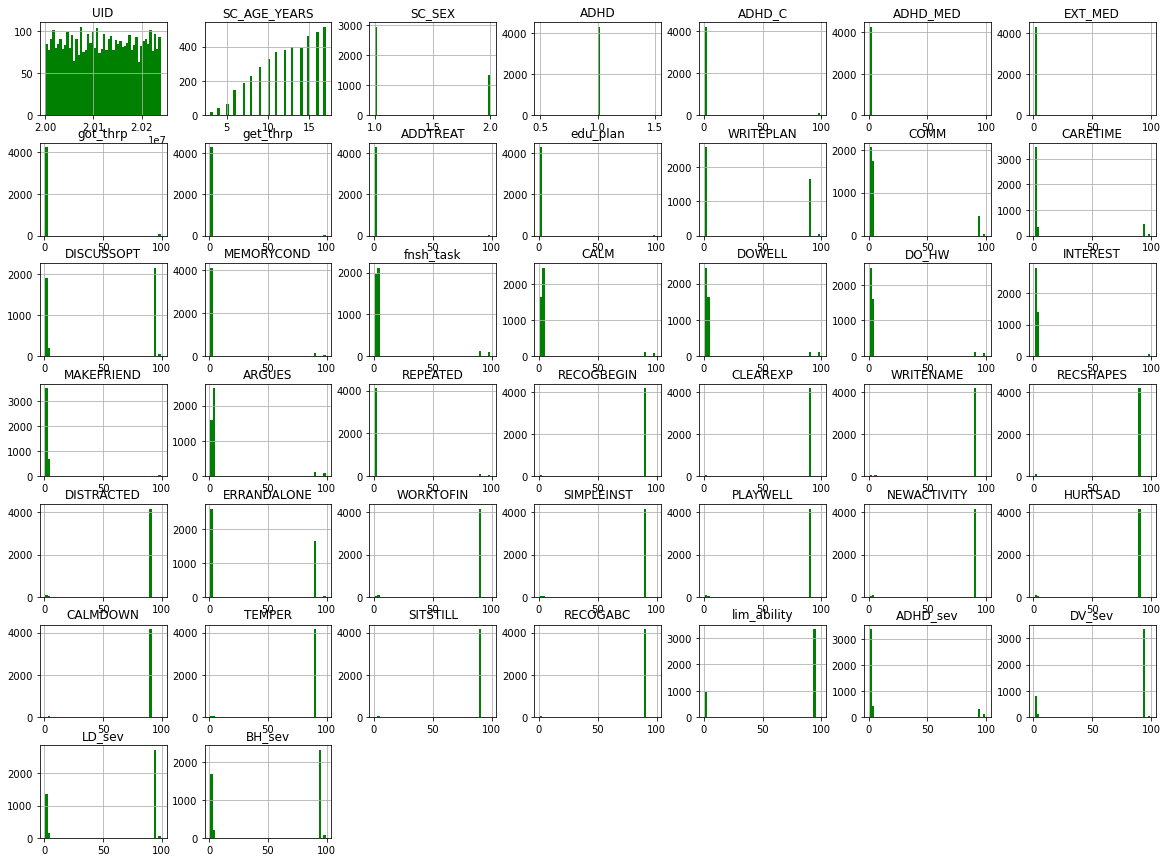

In [11]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15), color='green')
plt.show()

In [12]:
#displaying categories of values for each column with its count
col_names = list(data.columns.values) #update columns names
col_names.remove('UID')
for i in col_names:
    print(data[i].value_counts(dropna=False)) 

17    516
16    488
15    464
13    400
14    390
12    378
11    368
10    326
9     279
8     226
7     186
6     149
5      66
4      40
3      17
Name: SC_AGE_YEARS, dtype: int64
1    2954
2    1339
Name: SC_SEX, dtype: int64
1    4293
Name: ADHD, dtype: int64
1     3880
2      319
99      94
Name: ADHD_C, dtype: int64
1     2311
2     1960
99      22
Name: ADHD_MED, dtype: int64
1     2830
2     1461
99       2
Name: EXT_MED, dtype: int64
2     2233
1     2005
99      55
Name: got_thrp, dtype: int64
2     3169
1     1123
99       1
Name: get_thrp, dtype: int64
2     2492
1     1784
99      17
Name: ADDTREAT, dtype: int64
1     2282
2     1996
99      15
Name: edu_plan, dtype: int64
90    1657
2     1486
1     1108
99      42
Name: WRITEPLAN, dtype: int64
3     1746
2     1071
1      990
95     453
99      33
Name: COMM, dtype: int64
1     2308
2     1139
95     453
3      296
4       52
99      45
Name: CARETIME, dtype: int64
95    2149
1     1370
2      528
3      159
99      45


<a id='3B2'></a>
### 2.2 Dropping columns with too many missing value

In [13]:
#to handle missing values drop any columns that exceeds the threshold value
threshold = 0.5
data = data.loc[:, data.apply(lambda s: s.isin([90, 99])).mean().lt(threshold)]


<a id='3B3'></a>
### 2.3 Filling the missing data

In [14]:
import numpy as np
fill = ['DV_sev','LD_sev','BH_sev','lim_ability','ADHD_sev']

#Replacing 95(who don't have development, behavior, learning problems, limited ability) with zero
for i in fill:
    data[i] = np.where(data[i] == 95, 0, data[i])


In [15]:
med_fill = list(data.columns.values)
med_fill.remove('UID')
med_fill.remove('SC_AGE_YEARS')
#Replacing missing values with the median value for each column
for i in med_fill:
    median_value = int(data[i].median())
    data[i] = np.where(data[i] == 99, median_value, data[i])
    data[i] = np.where(data[i] == 90, median_value, data[i])
    data[i] = np.where(data[i] == 95, median_value, data[i])

#Dropping discuss options column since it has too many missing value
del data['DISCUSSOPT']

<a id='3C'></a>
# 3. Visualize data

In [16]:
#dropping ADHD column since we don't need it anymore
del data['ADHD']

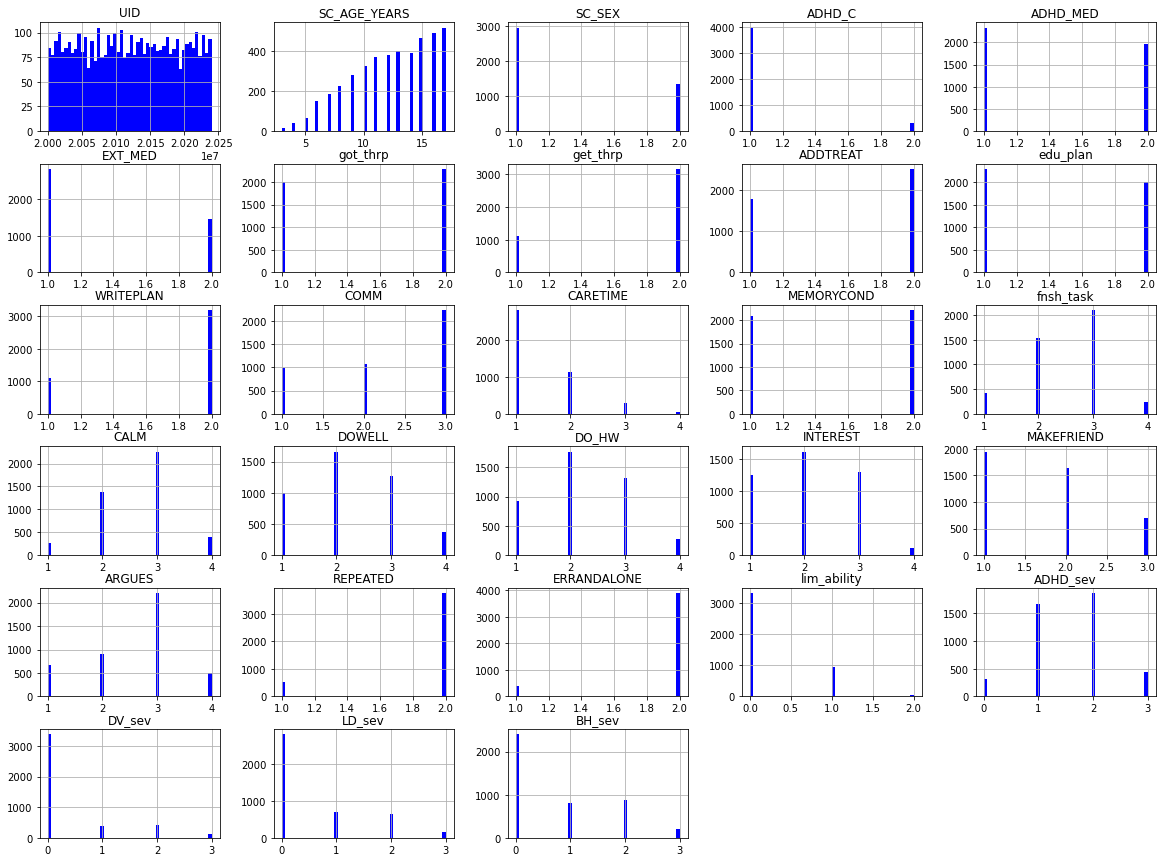

In [17]:
data.hist(bins=50, figsize=(20,15), color='blue')
plt.show()

<a id='3D'></a>
# 4. Adding more data from previous years

using the 2018 and 2019 datasets with the same columns and the same preprocessing steps

In [18]:
#the data are stored in a CSV file without headers
data2 = pd.read_csv('2018_2019_ADHD_DATASET.csv')

In [19]:
#Adding the data to the original dataframe
out = pd.concat([data, data.set_axis(data.columns, axis=1)], ignore_index=True) #ignore index to have an organized index

In [20]:
#exporting the final dataset into a new CSV file
#out.to_csv('FINAL_NSCH_ADHD_DATASET.csv',index = None, header=True)

In [21]:
out.shape[0]

8586

Now the dataset contains 8586 records

<a id='3D1'></a>
## 4.1 Plotting the data

*Note that it has a similar distrubition to the previous examples

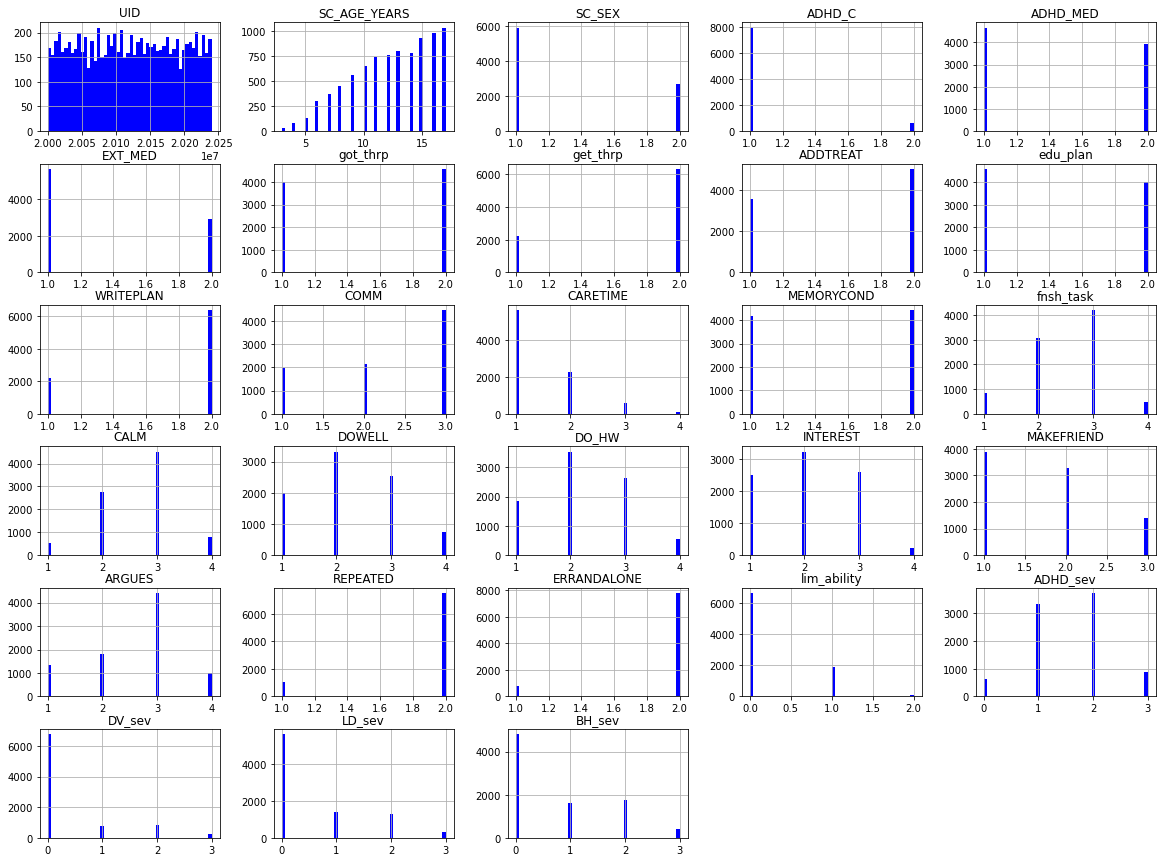

In [22]:
out.hist(bins=50, figsize=(20,15), color='blue')
plt.show()

<a id='4'></a>
# Filtering

<a id='4A'></a>
## 1. Data correlation

Examining data correlation to filter variables with high correlation <br>
If there are two variable with a 0.8 correlation, then one of them must be dropped

In [23]:
#out.corr()

<AxesSubplot:>

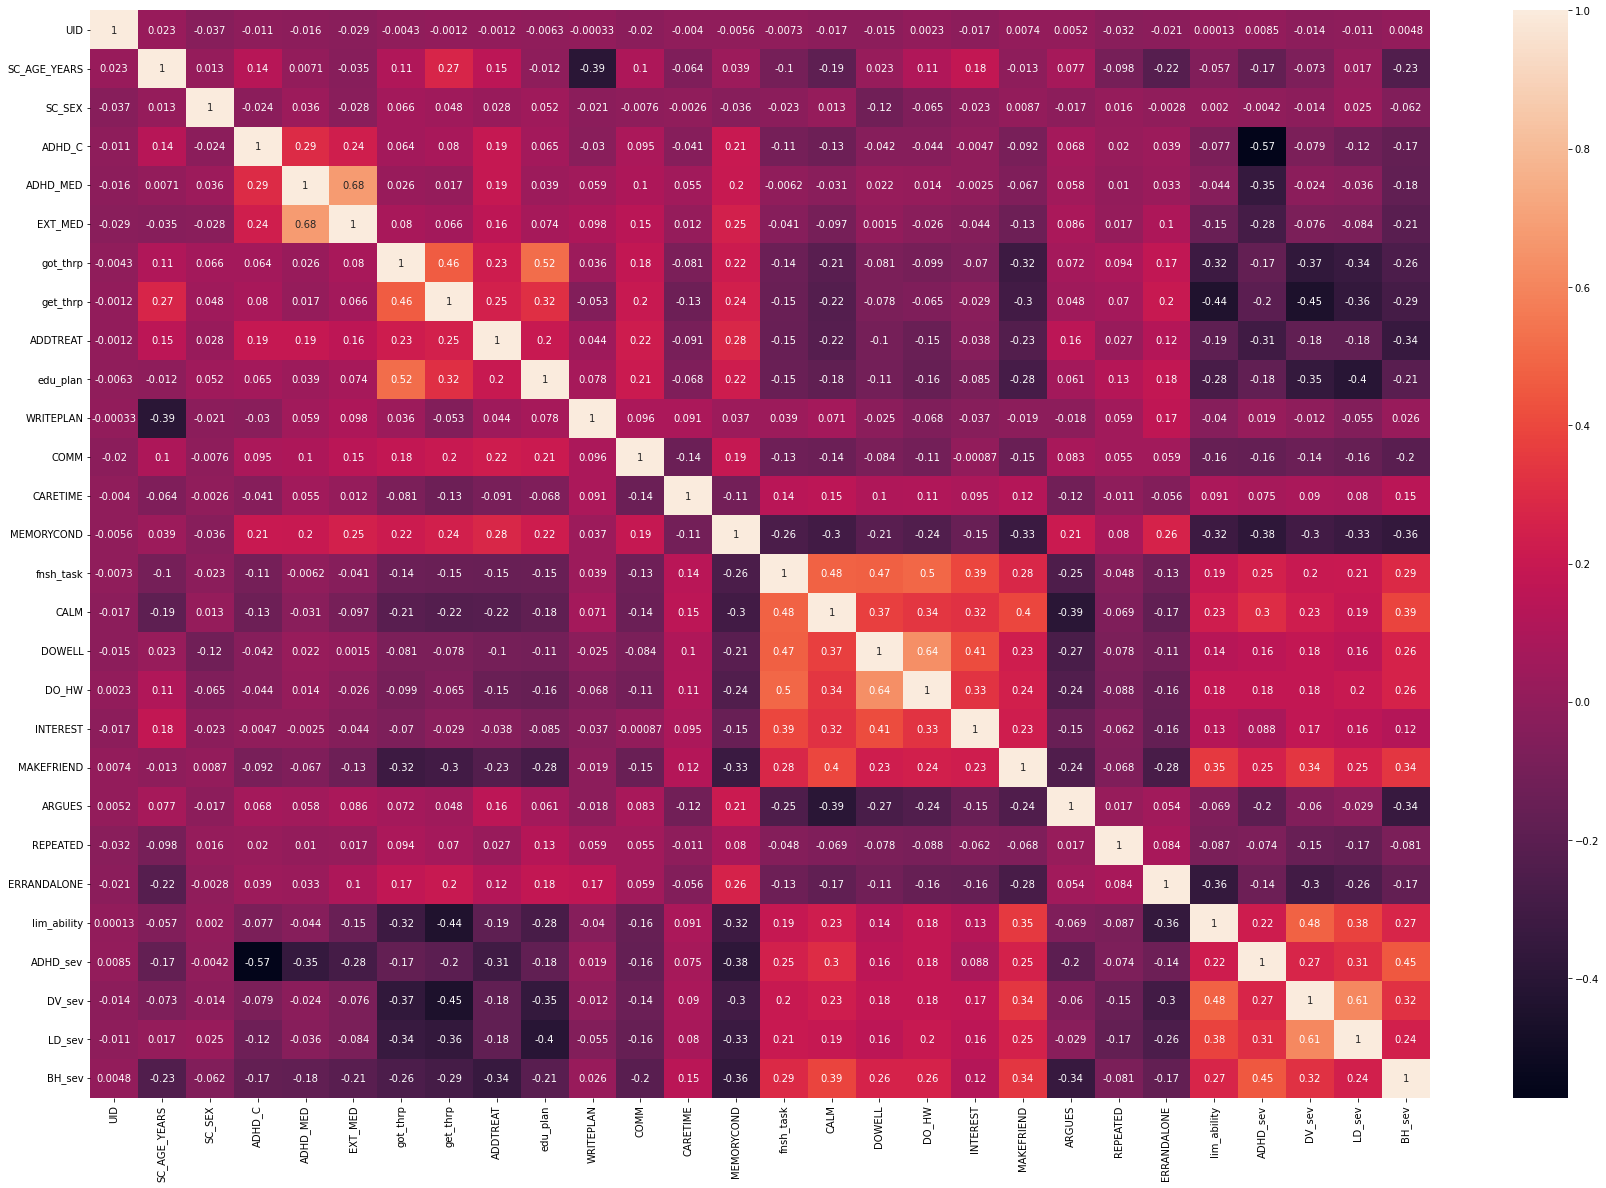

In [24]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(out.corr(), annot=True)

There is no high correlation between variables (0.8 or higher)

<a id='4B'></a>
## 2. Data variance

Filter any variables with low variance (close to zero) to avoid overfitting

In [25]:
out.var()

UID             4.812753e+09
SC_AGE_YEARS    1.193793e+01
SC_SEX          2.146446e-01
ADHD_C          6.879349e-02
ADHD_MED        2.481416e-01
EXT_MED         2.245289e-01
got_thrp        2.489426e-01
get_thrp        1.931825e-01
ADDTREAT        2.428982e-01
edu_plan        2.488000e-01
WRITEPLAN       1.915041e-01
COMM            6.669026e-01
CARETIME        4.569747e-01
MEMORYCOND      2.497891e-01
fnsh_task       5.570633e-01
CALM            5.363289e-01
DOWELL          8.143176e-01
DO_HW           7.296123e-01
INTEREST        6.996818e-01
MAKEFRIEND      5.324677e-01
ARGUES          7.905295e-01
REPEATED        1.087537e-01
ERRANDALONE     8.183885e-02
lim_ability     1.938249e-01
ADHD_sev        6.006437e-01
DV_sev          5.825616e-01
LD_sev          7.624444e-01
BH_sev          8.943652e-01
dtype: float64

There is no low variance between variables (close to zero)

<a id='5'></a>
# Target variable

The target variable or the predicted values will be "ADHD Severity",
this feature has 4 classes ranging from 0 to 1

| Class | Refers to | No. of examples |
| :-- | :--- | :--- |
| 0 | - No severity or extremely little | 638 |
| 1 | - Mild | 3332 |
| 2 | - Moderate | 3730 |
| 3 | - Severe | 886 |


This represent a multi-class classification problem


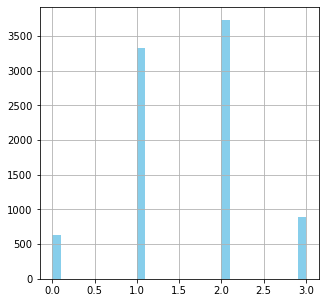

2    3730
1    3332
3     886
0     638
Name: ADHD_sev, dtype: int64

In [26]:
out['ADHD_sev'].hist(bins=30, figsize=(5,5), color='skyblue')
plt.show()
out['ADHD_sev'].value_counts(dropna=False)

### <font color='red'>Imbalanced distribution of examples across class labels will create a biased model</font>

Solutions for this problem will be disscussed later on.

<a id='6'></a>
#  Feature selection

The purpose behind this step is to avoid model overfitting and to reduce computational time. <br>
To determine what are the most important features before training the model we will use Recursive Feature Elemination (RFE) [2]<br>
technique to find the most important features and the number of needed features.

## How does this exactly work?

![RFE-drawio.png](https://i.postimg.cc/nhs0V79B/RFE-drawio.png)

In [27]:
#switching warnings off since they are a bit annoying :)
import warnings
warnings.filterwarnings('ignore')

## Splitting input and output features

In [828]:
#the ID feature should not be passed during the training/testing process, it will be used for identification only
X = out.drop(['UID','ADHD_C','ADHD_sev'], axis=1)
y = out['ADHD_sev'] #target variable

In [37]:
#using train_test_split to split the training and testing sets
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(X,y,test_size=0.2,random_state = 0)

In [31]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(6868, 25) (6868,)
(1718, 25) (1718,)


In [201]:
#importing random forest classifier and recursive feature elemenation

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    RFC = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select= i)
    RFC.fit(train_x, train_y)

    rfc_predict = RFC.predict(test_x)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(test_y, rfc_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.5512223515715948

Number of Selected features:  2
accuracy score: 0.5884749708963911

Number of Selected features:  3
accuracy score: 0.5960419091967404

Number of Selected features:  4
accuracy score: 0.5972060535506403

Number of Selected features:  5
accuracy score: 0.6216530849825378

Number of Selected features:  6
accuracy score: 0.6623981373690337

Number of Selected features:  7
accuracy score: 0.7252619324796274

Number of Selected features:  8
accuracy score: 0.7689173457508731

Number of Selected features:  9
accuracy score: 0.8050058207217695

Number of Selected features:  10
accuracy score: 0.840512223515716

Number of Selected features:  11
accuracy score: 0.8573923166472642

Number of Selected features:  12
accuracy score: 0.8789289871944121

Number of Selected features:  13
accuracy score: 0.8928987194412107

Number of Selected features:  14
accuracy score: 0.9027939464493597

Number of Selected features:  15
accuracy sc

*Running the above cell might take some time..

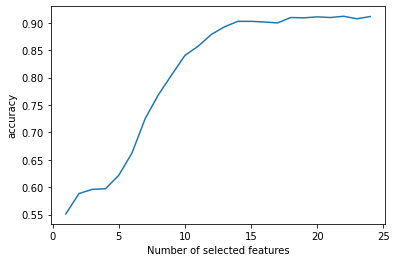

In [206]:
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 25),
    scores,
)
plt.show()

 When the number of selected feature is 22 we get a 0.912 accuracy which is the highest accuracy compared to other number of features

In [211]:
#specifying 22 features to select to find the elemenated features
RFC = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select= 22)
RFC.fit(train_x, train_y)
rfc_predict = RFC.predict(test_x)
print('accuracy score:', accuracy_score(test_y, rfc_predict))

accuracy score: 0.9121071012805588


In [212]:
RFC.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True])

In [213]:
features = train_x.columns[RFC.get_support()]
features


Index(['SC_AGE_YEARS', 'SC_SEX', 'ADHD_MED', 'EXT_MED', 'got_thrp', 'get_thrp',
       'ADDTREAT', 'edu_plan', 'WRITEPLAN', 'COMM', 'CARETIME', 'MEMORYCOND',
       'fnsh_task', 'CALM', 'DOWELL', 'DO_HW', 'INTEREST', 'MAKEFRIEND',
       'ARGUES', 'DV_sev', 'LD_sev', 'BH_sev'],
      dtype='object')

3 features were excluded which are:

In [214]:
excluded_feature = list(set(train_x.columns) - set(features))
print(excluded_feature)

['lim_ability', 'ERRANDALONE', 'REPEATED']


In [829]:
#drop features from X
X = X.drop(['lim_ability', 'ERRANDALONE', 'REPEATED'], axis=1)

In [830]:
#updating train & test sets
train_x, test_x,train_y, test_y = train_test_split(X,y,test_size=0.2,random_state = 0)

## Validating the results with cross-validation

In [218]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


rfc = RandomForestClassifier(n_estimators=100)
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X,y)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

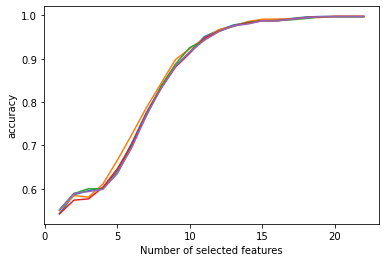

In [219]:
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, len(rfe.grid_scores_) + 1),
    rfe.grid_scores_,
)
plt.show()

The figure shows that the model is not overfitting as the K-fold cross validation scores looks good. <br>
The next step is choosing which algorithm to use. 

<a id='7'></a>
# Model Selection

As stated before this dataset has an imbalanced distribution for the target value (ADHD severity),
this problem can usually be solved using of these 4 approaches:

- 1. Algorithm level: by using classifier learning algorithms to bias the learning toward the minority class
- 2. Data level: by changining the distribution of data through using over-sampling or under-sampling
- 3. Cost-sensitive learning: it combines both data and algorithm levels
- 4. Ensemble-based: by using an ensemble learning algorithm in addition to one method from the above <br>
for more details please refer to <b>Learning from Imbalanced Data Sets</b> Book [3]. <br>
Through this section we will test diffrent options and select the most efficient one
(In terms of computational time and accuracy).

<a id='7A'></a>
## Metrics of evaluation

Since this dataset is imbalanced we cannot rely on the accuracy score alone, <br>
to make sure that the model is performing well; we will use the <b>Precision, Recall, and F1-score</b> <br>
as evaluation metrics during the model selection step and for the final evaluation we will introduce another option. <br>


These scores can be calculated easily using a confusion matrix,<br>
which will compare between the actual values and the predicted values by the model.<br>
For our case we will have a 4x4 matrix that describes the following 4 cases:
- <b>TP:</b> the number of correct postive predictions 
- <b>TN:</b> the number of correct negative predictions 
- <b>FP:</b> the number of incorrect postive predictions 
- <b>FN:</b> the number of incorrect negative predictions 


an example of the confusion matrix for 4 classes

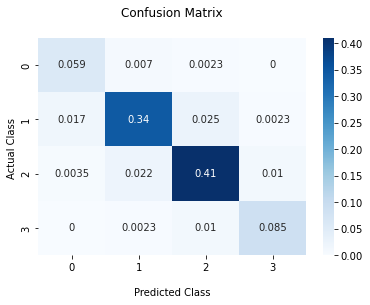

In [191]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
cm_fig = sns.heatmap(cm/np.sum(cm), annot=True
           , cmap='Blues')
cm_fig.set_title('Confusion Matrix\n')
cm_fig.set_xlabel('\nPredicted Class')
cm_fig.set_ylabel('Actual Class ')
cm_fig.xaxis.set_ticklabels([0,1,2,3])
cm_fig.yaxis.set_ticklabels([0,1,2,3])

plt.show()

And finally, the scores can be calaculated as follow: <br>
- <b>Accuracy</b> = ( TP + TN ) / total
- <b>Precision</b> = TP / ( TP + FP )
- <b>Recall</b> = TP / ( TP + FN )
- <b>F1 score</b> = harmonic mean (Precision, Recall) = 2 x Precision x Recall / (Precision + Recall)


<a id='7B'></a>
## SVM

Support vector machines [4] are one of the most popular classification algorithms for supervised machine learning, <br>
it seperate data linearly by making straight lines between the classes. <br>
![Untitled-Diagram-drawio.png](https://i.postimg.cc/W14WwNTR/Untitled-Diagram-drawio.png)


### Feature scaling

SVM algorithm perfoms well on scaled data so before passing X to the model we will scale it first

In [627]:
cols = train_x.columns

In [628]:
from sklearn.preprocessing import StandardScaler
# Scaling the X Train and X Test set 
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)


In [629]:
train_x = pd.DataFrame(train_x, columns=[cols])
test_x = pd.DataFrame(test_x, columns=[cols])

In [250]:
from sklearn.svm import SVC
#using sklearn library 
svc = SVC(C=10) 
svc.fit(train_x,train_y)
pred_y = svc.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy with default parameters:' , acc)

accuracy with default parameters: 0.8009313154831199


In [251]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       117
           1       0.77      0.83      0.80       666
           2       0.85      0.81      0.83       767
           3       0.88      0.77      0.83       168

    accuracy                           0.80      1718
   macro avg       0.78      0.77      0.77      1718
weighted avg       0.81      0.80      0.80      1718



Class 0 was mostly not classified right compared to other classes. <br>
SVM usually do not perform well on multi-class problems, <br>
but we can use the <b>class_weight</b> parameter to assign a higher penalty for misclassifying the minority class.

In [252]:

w = {0:1000, 1:100, 2:80, 3:500} #after testing multipule weights these weights perform well
svc = SVC(gamma='scale', class_weight = w , C=1000) #assigning a higher penalty for misclassification 
svc.fit(train_x,train_y)
pred_y = svc.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy:' , acc)


accuracy: 0.8940628637951106


In [253]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       117
           1       0.91      0.89      0.90       666
           2       0.91      0.91      0.91       767
           3       0.88      0.87      0.87       168

    accuracy                           0.89      1718
   macro avg       0.86      0.88      0.87      1718
weighted avg       0.90      0.89      0.89      1718



We can notice that the f1-score did inreace after assigning diffrent weights <br>

<a id='7C'></a>
## ANN

Neural networks can be directly used for multi-class problems, using the same class weight paramter we will adjust the minority classes weights and see how the model would perform. We will use keras [5] to build this neural network.

In [31]:
#importing keras packages
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout

In [822]:
#scaling X and encoding y
new_y = to_categorical(y)
sc = StandardScaler()
new_x = pd.DataFrame(sc.fit_transform(X))

In [823]:
#updating train & test sets
train_x, test_x,train_y, test_y = train_test_split(new_x,new_y,test_size=0.2,random_state = 0)

In [342]:
#setting the weights
w = {0:0.9, 1:0.5, 2:0.5, 3:0.85}

### Neural network using keras

In [450]:
model = Sequential()
# 22 input -> (18 hidden nodes -> 10 hidden nodes -> 8 hidden nodes) -> 4 outpus
#using ReLU as an activation function for all layers except the output
model.add(Dense(18, input_shape = (22,), activation = 'relu'))
model.add(Dense(10, activation = "relu"))
model.add(Dense(8, activation = "relu"))
#using softmax for the output layer since it is a multi-class problem
model.add(Dense(4, activation = 'softmax'))
#defining the loss function and using Adam optimizer from keras
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#print the summary for the model
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_239 (Dense)           (None, 18)                414       
                                                                 
 dense_240 (Dense)           (None, 10)                190       
                                                                 
 dense_241 (Dense)           (None, 8)                 88        
                                                                 
 dense_242 (Dense)           (None, 4)                 36        
                                                                 
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________


In [451]:
history = model.fit(train_x, train_y, epochs=500,class_weight=w)

Epoch 1/500
215/215 [==============================] - 1s 1ms/step - loss: 0.7246 - categorical_accuracy: 0.4869
Epoch 2/500
215/215 [==============================] - 1s 3ms/step - loss: 0.6129 - categorical_accuracy: 0.5457
Epoch 3/500
215/215 [==============================] - 1s 3ms/step - loss: 0.5679 - categorical_accuracy: 0.5460
Epoch 4/500
215/215 [==============================] - 1s 2ms/step - loss: 0.5533 - categorical_accuracy: 0.5476
Epoch 5/500
215/215 [==============================] - 1s 3ms/step - loss: 0.5451 - categorical_accuracy: 0.5531
Epoch 6/500
215/215 [==============================] - 1s 3ms/step - loss: 0.5388 - categorical_accuracy: 0.5622
Epoch 7/500
215/215 [==============================] - 1s 2ms/step - loss: 0.5331 - categorical_accuracy: 0.5687
Epoch 8/500
215/215 [==============================] - 1s 3ms/step - loss: 0.5293 - categorical_accuracy: 0.5747
Epoch 9/500
215/215 [==============================] - 0s 1ms/step - loss: 0.5259 - categorical_

In [452]:
from sklearn.metrics import classification_report,accuracy_score
pred_y = model.predict(test_x)
pred_y = np.argmax(pred_y, axis=1)
test_classes = np.argmax(test_y, axis=1)
print(classification_report(test_classes, pred_y.round()))

54/54 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.39      0.70      0.50       117
           1       0.62      0.64      0.63       666
           2       0.71      0.56      0.63       767
           3       0.53      0.68      0.60       168

    accuracy                           0.61      1718
   macro avg       0.56      0.64      0.59      1718
weighted avg       0.64      0.61      0.62      1718



After balancing the weights we can notice that the scores are unstable

### Loss and accuracy

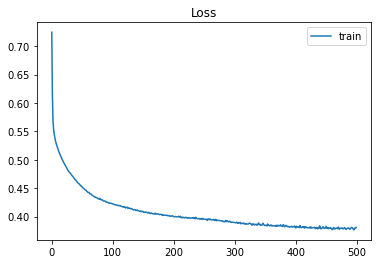

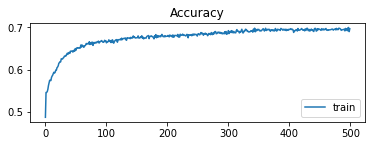

In [455]:
#plotting the loss function and the accuracy
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()
print('\n')
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.legend()
plt.show()

The performance stopped improving after 400 iterations and the loss function did not improve as well

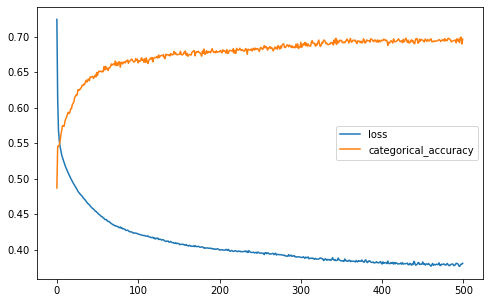

In [456]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

After testing multiple network architectures the performance did not improve, <br>
this model scored around 70% accuracy which is a poor performance. <br>
We will shift our focus to utilize other algorithms.

<a id='7D'></a>
## Decision tree 

Simply, a decision tree classesifies the data based on a splitting criteria until it gets to the leaf node [6].<br>
Decision trees are appropriate for multi-class classification, but because the taregt is imbalanced, we must set different weights. 

In [463]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#using default parameter criterion = 'gini',
#splitter = 'best' , max_depth = 'None'

w = {0:10, 1:2, 2:1, 3:6} #assigning wieghts
dtc = DecisionTreeClassifier(class_weight = w)
dtc.fit(train_x, train_y)
pred_y = dtc.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy:' , acc)

accuracy: 0.889988358556461


In [464]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       117
           1       0.90      0.89      0.89       666
           2       0.93      0.90      0.91       767
           3       0.78      0.89      0.83       168

    accuracy                           0.89      1718
   macro avg       0.85      0.88      0.86      1718
weighted avg       0.89      0.89      0.89      1718



### Visualizing the tree

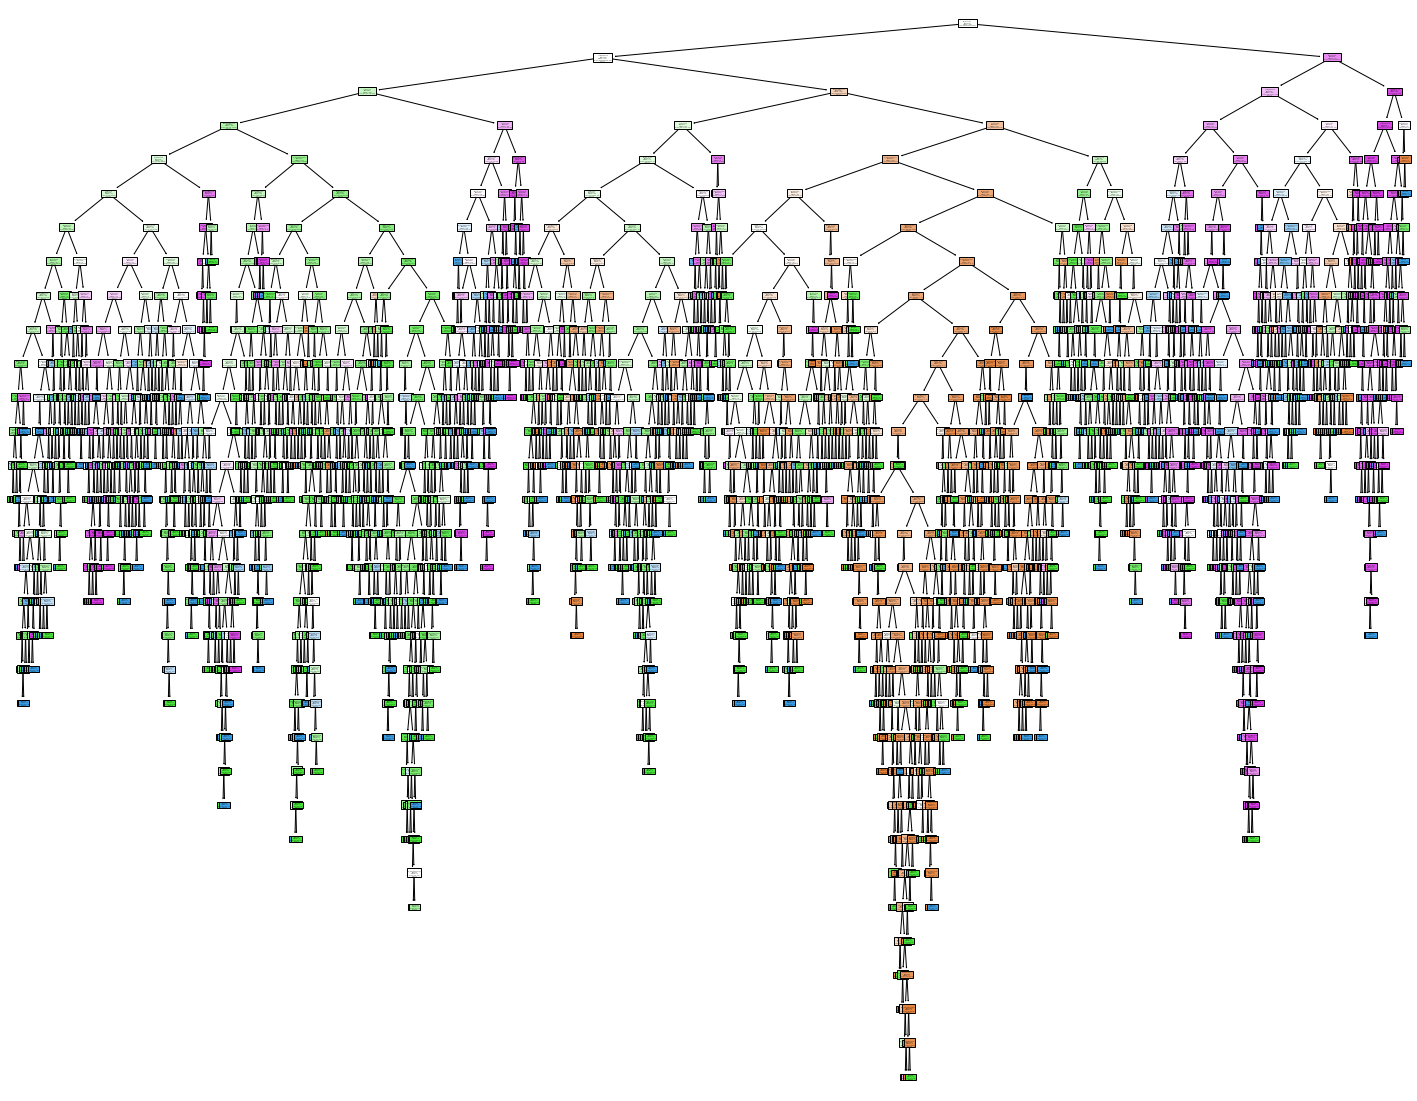

In [84]:

fig = plt.figure(figsize=(25,20))
dtc_tree = tree.plot_tree(dtc, 
                   feature_names=list(X.columns.values),  
                   class_names=['1','2','3','4'],
                   filled=True)


<a id='7E'></a>
## Bagging Classifier

This classifier will use desicion tree as a base estimator to predict the result for diffrent models which
will reduce overfitting [7].

In [764]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(n_estimators = 200)
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy: ' , acc)

accuracy:  0.8969732246798603


In [765]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       117
           1       0.90      0.90      0.90       666
           2       0.91      0.91      0.91       767
           3       0.90      0.86      0.88       168

    accuracy                           0.90      1718
   macro avg       0.88      0.88      0.88      1718
weighted avg       0.90      0.90      0.90      1718



<a id='7F'></a>
## AdaBoost

AdaBoost [8] uses an iterative technique to learn from the mistakes and errors of weak classifiers, and then turn them into strong ones.

In [846]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators = 300,
    learning_rate = 0.1,
    algorithm = "SAMME",
    )
ada.fit(train_x, train_y)
pred_y = ada.predict(test_x)

accuracy = accuracy_score(test_y, pred_y)
print("Accuracy: " , accuracy)


Accuracy:  0.8946449359720605


In [847]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.89      0.91      0.90       666
           2       0.92      0.90      0.91       767
           3       0.82      0.88      0.85       168

    accuracy                           0.89      1718
   macro avg       0.87      0.88      0.88      1718
weighted avg       0.90      0.89      0.89      1718



<a id='7G'></a>
## Random forest

Random forest algorithm [9] consist of multiple trees to determine the output but using a subset of the features. <br> It also improves the accuracy and controls overfitting problem, and that's why they are suitable for this problem. <br> The RandomForestClassifier [cite] has a class_weight parameter like many algorithms but with a balanced option that <br> determines the classes weights. 

In [788]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000,
                                  class_weight='balanced')
rf_model.fit(train_x,train_y)
pred_y = rf_model.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy: ' , acc)

accuracy:  0.9051222351571595


In [791]:

rf_model = RandomForestClassifier(n_estimators =500,
                                  n_jobs = -1,
                                  criterion = 'gini',
                                  class_weight ='balanced',
                                  bootstrap = False
                                  )
rf_model.fit(train_x,train_y)
pred_y = rf_model.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy: ' , acc)

accuracy:  0.9091967403958091


In [796]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       117
           1       0.90      0.91      0.90       666
           2       0.92      0.92      0.92       767
           3       0.94      0.88      0.91       168

    accuracy                           0.91      1718
   macro avg       0.89      0.88      0.89      1718
weighted avg       0.91      0.91      0.91      1718



In [505]:
params = [{'n_estimators': [300, 500, 1000], 
           'class_weight': ['balanced', 'balanced_subsample'] 
          }]
#setting diffrent parameters to see which one would work best

In [506]:
from sklearn.model_selection import GridSearchCV

rfc_grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
rfc_grid.fit(X, y)
print(rfc_grid.best_params_)

{'class_weight': 'balanced', 'n_estimators': 500}


These parameters will be assigned to the above model

<a id='7H'></a>
## Extremely Randomized Trees

Extremely Randomized trees [10] are similar to Random Forest classifier except that it use random splits of all observations rather than using the best split.

In [746]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 300,
                             class_weight ='balanced')
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy: ' , acc)

accuracy:  0.9115250291036089


In [747]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.91      0.92      0.91       666
           2       0.92      0.92      0.92       767
           3       0.94      0.86      0.89       168

    accuracy                           0.91      1718
   macro avg       0.90      0.89      0.90      1718
weighted avg       0.91      0.91      0.91      1718



In [659]:
params = [{'n_estimators': [300, 500, 1000], 
           'class_weight': ['balanced', 'balanced_subsample'] 
          }]
#setting diffrent parameters to see which one would work best

In [660]:
rfc_grid = GridSearchCV(ExtraTreesClassifier(), params, cv=5)
rfc_grid.fit(X, y)
print(rfc_grid.best_params_)

{'class_weight': 'balanced', 'n_estimators': 300}


These parameters will be assigned to the above model

<a id='7I'></a>
##  Extreme Gradient Boosting 

In XGB Classifier [11], decision trees are created in sequential form, <br> where errors are fed to the second decision tree to create a
strong and more precise model.

In [803]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 300)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

accuracy = accuracy_score(test_y, pred_y)
print("Accuracy: " , accuracy)

Accuracy:  0.889406286379511


In [804]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       117
           1       0.88      0.88      0.88       666
           2       0.92      0.90      0.91       767
           3       0.92      0.91      0.91       168

    accuracy                           0.89      1718
   macro avg       0.86      0.88      0.87      1718
weighted avg       0.89      0.89      0.89      1718



<a id='7J'></a>
## CatBoost

Catboost algorithm [12] focus on categorical features, although it is not suitable for multiclass but we will use the class_weights parameter and see how it performs.

In [805]:
w = [0.8, 0.4, 0.4, 0.8]

In [808]:
from catboost import CatBoostClassifier

cat = np.where(X.dtypes != np.float)[0]
catboost = CatBoostClassifier(iterations=2000,
                            learning_rate=0.1,
                   loss_function='MultiClass',
                       eval_metric='Accuracy',
                              class_weights=w
                             )
                              #class_weights=w)
catboost.fit(train_x, train_y, cat_features = cat, eval_set=(test_x, test_y))
pred_y = catboost.predict(test_x)

0:	learn: 0.5339830	test: 0.5461807	best: 0.5461807 (0)	total: 185ms	remaining: 6m 9s
1:	learn: 0.5507586	test: 0.5456815	best: 0.5461807 (0)	total: 372ms	remaining: 6m 11s
2:	learn: 0.5623535	test: 0.5691463	best: 0.5691463 (2)	total: 568ms	remaining: 6m 17s
3:	learn: 0.5518688	test: 0.5621568	best: 0.5691463 (2)	total: 767ms	remaining: 6m 22s
4:	learn: 0.5688911	test: 0.5561658	best: 0.5691463 (2)	total: 964ms	remaining: 6m 24s
5:	learn: 0.5702479	test: 0.5571643	best: 0.5691463 (2)	total: 1.16s	remaining: 6m 26s
6:	learn: 0.5703713	test: 0.5581628	best: 0.5691463 (2)	total: 1.39s	remaining: 6m 35s
7:	learn: 0.5716048	test: 0.5616575	best: 0.5691463 (2)	total: 1.59s	remaining: 6m 35s
8:	learn: 0.5709880	test: 0.5616575	best: 0.5691463 (2)	total: 1.81s	remaining: 6m 40s
9:	learn: 0.5740718	test: 0.5866201	best: 0.5866201 (9)	total: 2.02s	remaining: 6m 42s
10:	learn: 0.5743185	test: 0.5826261	best: 0.5866201 (9)	total: 2.23s	remaining: 6m 43s
11:	learn: 0.5759220	test: 0.5751373	best: 

In [809]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       117
           1       0.73      0.76      0.75       666
           2       0.77      0.77      0.77       767
           3       0.80      0.68      0.73       168

    accuracy                           0.75      1718
   macro avg       0.73      0.71      0.72      1718
weighted avg       0.75      0.75      0.75      1718



<a id='7K'></a>
## LightGBM 

LightGBM classifier [13] supports the balanced class option, but overall it didn't give a high accuracy for this problem.

In [820]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective = "multiclass",
                       num_classes= 4,
                       learning_rate = 0.1,
                      class_weight = 'balanced')
model.fit(train_x, train_y)
model.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print('accuracy: ' , acc)

accuracy:  0.7479627473806753


In [821]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       117
           1       0.73      0.76      0.75       666
           2       0.77      0.77      0.77       767
           3       0.80      0.68      0.73       168

    accuracy                           0.75      1718
   macro avg       0.73      0.71      0.72      1718
weighted avg       0.75      0.75      0.75      1718



<a id='8'></a>
# Final Evaluation

Summary of the models highest scores:

In [853]:
models_score = [['ann', 0.699],
                ['LGB', 0.747],
                ['Cat', 0.750],
                ['DT',  0.889],
                ['Ada', 0.894],
                ['svm', 0.894],
                ['Bag', 0.896],
                ['RF',  0.909],
                ['Ext', 0.911]]
   
scores = np.array(models_score)

sc_frame = pd.DataFrame(scores, columns = ['Model','Score'])

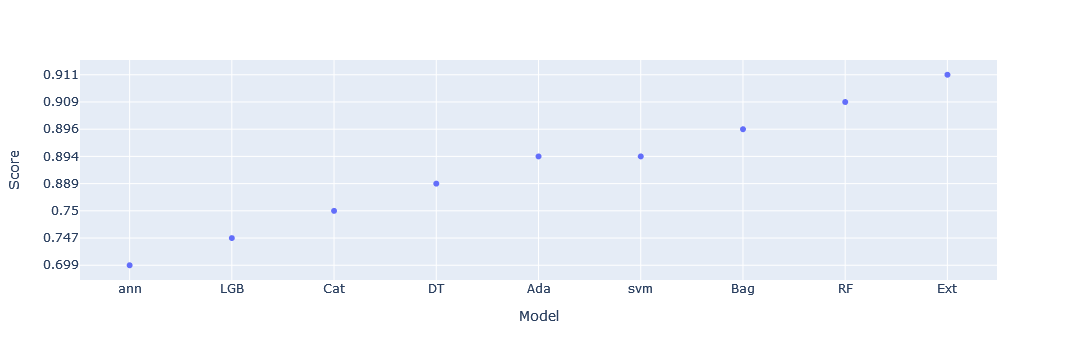

In [854]:
import plotly.express as px
 
fig = px.scatter(sc_frame, x="Model", y="Score")

fig.show()

The Random Forest and the Extremely Randomized Trees have outperformed 8 models, <br> the next step is to cross-validate the two models using the balanced accuracy scores <br> (also known as macro average arithmetic) and it is computed as the mean of the correct hits for each class.

### Random Forest Cross-validation

In [858]:
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from numpy import std

rf_model = RandomForestClassifier(n_estimators =500,
                                  n_jobs = -1,
                                  criterion = 'gini',
                                  class_weight ='balanced',
                                  bootstrap = False
                                  )

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf_model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)

print('Balanced accuracy scores: %.3f (%.3f)' % (mean(scores), std(scores)))

Balanced accuracy scores: 0.949 (0.015)


In [859]:
scores

array([0.93569965, 0.94824999, 0.94784354, 0.91879951, 0.95701145,
       0.96714074, 0.94906527, 0.93750455, 0.95852085, 0.97458443])

### Extra Tress Cross-validation

In [860]:
model = ExtraTreesClassifier(n_estimators = 300,
                             class_weight ='balanced')

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)

print('Balanced accuracy scores: %.3f (%.3f)' % (mean(scores), std(scores)))

Balanced accuracy scores: 0.949 (0.015)


In [862]:
scores

array([0.93984796, 0.94824999, 0.94935411, 0.91879951, 0.96577284,
       0.96345243, 0.95189813, 0.92826596, 0.95873462, 0.96809092])

<br> <b> Both models scored 0.949 balanced accuracy. </b>

### ROC Curves

ROC curves represent the area for True positive rate and False positive rate, when the area is close to 1 the model would perform better.

In [884]:
from sklearn.multiclass import OneVsRestClassifier

oneVSrest = OneVsRestClassifier(rf_model)
oneVSrest.fit(train_x,train_y)
pred_y = oneVSrest.predict(test_x)
pred_prob = oneVSrest.predict_proba(test_x)

In [885]:
oneVSrest2 = OneVsRestClassifier(model)
oneVSrest2.fit(train_x,train_y)
pred_y2 = oneVSrest2.predict(test_x)
pred_prob2 = oneVSrest2.predict_proba(test_x)

In [872]:
from sklearn.preprocessing import label_binarize
test_y_cat = label_binarize(test_y, classes=[0,1,2,3])

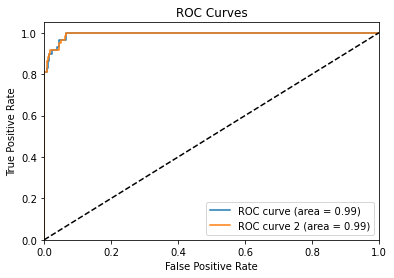

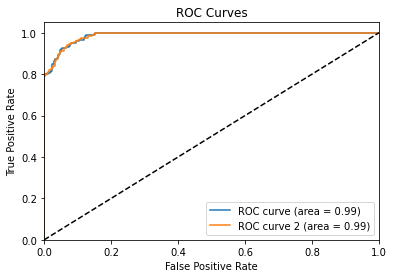

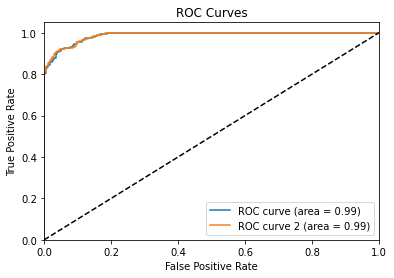

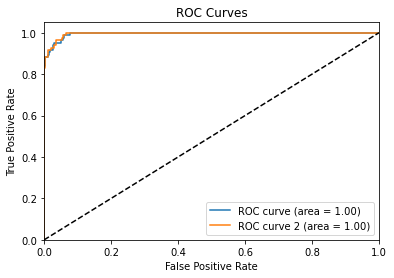

In [892]:
from sklearn.metrics import roc_curve, auc


FPR = dict()
TPR = dict()
ROC = dict()

FPR2 = dict()
TPR2 = dict()
ROC2 = dict()
n = 4
for i in range(n):
    FPR[i], TPR[i], _ = roc_curve(test_y_cat[:,i], pred_prob[:,i])
    FPR2[i], TPR2[i], _2 = roc_curve(test_y_cat[:,i], pred_prob2[:,i])
    ROC[i] = auc(FPR[i], TPR[i])
    ROC2[i] = auc(FPR2[i], TPR2[i])
    
for i in range(n):
    plt.figure()
    plt.plot(FPR[i], TPR[i], label='ROC curve (area = %0.2f)' % ROC[i])
    plt.plot(FPR2[i], TPR2[i], label='ROC curve 2 (area = %0.2f)' % ROC2[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

<b> Both models have similar ROC curves for all classes. </b>

### Kappa statistic

Cohen’s Kappa statistic metric will determine which model performs better as it shows the level of agreement between the actual classes and the predicted classes.

In [904]:
from sklearn.metrics import cohen_kappa_score

rf_model = RandomForestClassifier(n_estimators =500,
                                  n_jobs = -1,
                                  criterion = 'gini',
                                  class_weight ='balanced',
                                  bootstrap = False,
                                  random_state = 0
                                  )
rf_model.fit(train_x,train_y)
pred_y = rf_model.predict(test_x)

model = ExtraTreesClassifier(n_estimators = 300,
                             class_weight ='balanced',
                             random_state = 0)
model.fit(train_x, train_y)
pred_y2 = model.predict(test_x)


print('Random Forest score: %0.3f' % cohen_kappa_score(test_y, pred_y, weights = None))
print('Extra Trees score: %0.3f' % cohen_kappa_score(test_y, pred_y2, weights = None))

Random Forest score: 0.853
Extra Trees score: 0.851


<b> With a slight margin, the Random Forest got a higher score. 🎉</b>

<a id='9'></a>
# Conclusion 

For this particular problem,  ensemble-based algorithms showed a really good results compared to other algorithms. <br>
To determine which model would perform best, we tested a variety of imbalanced multi-class measures for the final review. <br>
The Random Forest Classifier showed excellent results with approximately 95% balanced accuracy and extremely low false positive<br>
and false negative rates, indicating that this model is an appropriate choice for this problem. In addition, We used a cross-validation <br>process to evaluate the model's overall performance for internal validation. Finally, the chosen model must then be deployed<br> in order to evaluate its performance in real-world scenarios. 

<a id='10'></a>
# References

- [1] Child and Adolescent Health Measurement Initiative (CAHMI) (2020). 2020 National Survey of Children's Health, SAS Indicator dataset. Data  Resource Center for Child and Adolescent Health supported by Cooperative Agreement U59MC27866 from the U.S. Department of Health and Human Services, Health Resources and Services Administration (HRSA), Maternal and Child Health Bureau (MCHB). Retrieved 7/12/2022 from <a hresf ='childhealthdata.org'> childhealthdata.org </a>
    
- [2] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html'> sklearn.feature_selection.RFE </a>

- [3] Fernández, Alberto, et al. Learning from imbalanced data sets. Vol. 10. Berlin: Springer, 2018.

- [4] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html'> sklearn.svm.SVC </a>

- [5] <a href='https://keras.io/guides/sequential_model/'> The Sequential model </a>

- [6] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'> sklearn.tree.DecisionTreeClassifier </a>

- [7] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html'> sklearn.ensemble.BaggingClassifier </a>

- [8] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html'> sklearn.ensemble.AdaBoostClassifier </a>

- [9] <a href='https://scikit-learn.org/stable/modules/ensemble.html?highlight=random+forest'> Forests of randomized trees </a>

- [10] <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html'> sklearn.ensemble.ExtraTreesClassifier </a>

- [11] <a href='https://xgboost.readthedocs.io/en/stable/'> XGBoost Documentation </a>

- [12] <a href='https://catboost.ai/en/docs/'> CatBoost algorithm </a>

- [13] <a href='https://lightgbm.readthedocs.io/en/v3.3.2/'> LightGBM </a>